# Stock Market Prediction of Stoxx 600 Europe companies using Machine Learning Techniques

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv("StoxxEurope600.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,889.50,886.23,897.83,886.23,2.86M,0.43%
1,06/27/2024,885.71,883.93,889.91,883.93,2.65M,0.09%
2,06/26/2024,884.92,888.10,896.63,881.14,3.78M,0.29%
3,06/25/2024,882.38,874.42,882.45,865.44,3.04M,0.19%
4,06/24/2024,880.71,887.08,888.52,877.67,3.35M,-0.77%
...,...,...,...,...,...,...,...
3021,09/19/2012,211.65,211.78,211.80,210.03,9.22M,0.02%
3022,09/18/2012,211.61,211.46,212.21,210.27,9.87M,-0.30%
3023,09/17/2012,212.24,212.36,212.82,211.65,9.20M,-0.34%
3024,09/14/2012,212.96,211.03,213.97,211.03,14.75M,1.64%


In [17]:
data.shape

(3026, 7)

In [18]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,889.50,886.23,897.83,886.23,2.86M,0.43%
1,885.71,883.93,889.91,883.93,2.65M,0.09%
2,884.92,888.10,896.63,881.14,3.78M,0.29%
3,882.38,874.42,882.45,865.44,3.04M,0.19%
4,880.71,887.08,888.52,877.67,3.35M,-0.77%
...,...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M,0.02%
3022,211.61,211.46,212.21,210.27,9.87M,-0.30%
3023,212.24,212.36,212.82,211.65,9.20M,-0.34%
3024,212.96,211.03,213.97,211.03,14.75M,1.64%


In [19]:
data.describe()

,Price,Open,High,Low
count,3026.000000,3026.000000,3026.000000,3026.000000
mean,476.512515,476.442845,480.262753,472.489788
std,173.749960,173.729858,175.421674,171.991065
min,200.890000,200.520000,202.260000,198.930000
25%,331.345000,331.192500,333.980000,329.127500
50%,447.585000,447.590000,451.105000,444.425000
75%,610.190000,609.782500,620.325000,604.220000
max,914.000000,914.220000,917.390000,897.640000


In [20]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [21]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,889.50,886.23,897.83,886.23,2.86M,0.43%
1,885.71,883.93,889.91,883.93,2.65M,0.09%
2,884.92,888.10,896.63,881.14,3.78M,0.29%
3,882.38,874.42,882.45,865.44,3.04M,0.19%
4,880.71,887.08,888.52,877.67,3.35M,-0.77%
...,...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M,0.02%
3022,211.61,211.46,212.21,210.27,9.87M,-0.30%
3023,212.24,212.36,212.82,211.65,9.20M,-0.34%
3024,212.96,211.03,213.97,211.03,14.75M,1.64%


In [22]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3026 non-null   float64
 1   Open      3026 non-null   float64
 2   High      3026 non-null   float64
 3   Low       3026 non-null   float64
 4   Vol.      3026 non-null   object 
 5   Change %  3026 non-null   object 
dtypes: float64(4), object(2)
memory usage: 142.0+ KB


In [24]:
df.drop(columns=['Change %'],inplace=True)
df

,Price,Open,High,Low,Vol.
0,889.50,886.23,897.83,886.23,2.86M
1,885.71,883.93,889.91,883.93,2.65M
2,884.92,888.10,896.63,881.14,3.78M
3,882.38,874.42,882.45,865.44,3.04M
4,880.71,887.08,888.52,877.67,3.35M
...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M
3022,211.61,211.46,212.21,210.27,9.87M
3023,212.24,212.36,212.82,211.65,9.20M
3024,212.96,211.03,213.97,211.03,14.75M


In [25]:
df.sample(10)

,Price,Open,High,Low,Vol.
418,610.20,563.33,610.96,560.59,6.28M
1610,437.49,445.14,445.14,434.60,7.07M
2359,367.06,369.18,371.76,366.82,9.85M
1678,446.89,444.93,448.59,443.29,7.55M
504,543.80,547.58,549.09,531.76,7.46M
2705,275.23,278.81,278.81,275.23,8.44M
1503,471.27,470.83,472.43,469.52,4.03M
1634,442.08,439.79,442.99,439.79,5.45M
2813,259.46,258.72,261.02,258.72,7.36M
2131,329.35,324.83,330.29,324.83,5.08M


In [26]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

In [27]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

,Price,Open,High,Low,Vol.,Volume(K)
0,889.50,886.23,897.83,886.23,2.86M,2860.0
1,885.71,883.93,889.91,883.93,2.65M,2650.0
2,884.92,888.10,896.63,881.14,3.78M,3780.0
3,882.38,874.42,882.45,865.44,3.04M,3040.0
4,880.71,887.08,888.52,877.67,3.35M,3350.0
...,...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9.22M,9220.0
3022,211.61,211.46,212.21,210.27,9.87M,9870.0
3023,212.24,212.36,212.82,211.65,9.20M,9200.0
3024,212.96,211.03,213.97,211.03,14.75M,14750.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      3026 non-null   float64
 1   Open       3026 non-null   float64
 2   High       3026 non-null   float64
 3   Low        3026 non-null   float64
 4   Vol.       3026 non-null   object 
 5   Volume(K)  3026 non-null   float64
dtypes: float64(5), object(1)
memory usage: 142.0+ KB


In [29]:
df.drop(columns=['Vol.'], inplace=True)
df

,Price,Open,High,Low,Volume(K)
0,889.50,886.23,897.83,886.23,2860.0
1,885.71,883.93,889.91,883.93,2650.0
2,884.92,888.10,896.63,881.14,3780.0
3,882.38,874.42,882.45,865.44,3040.0
4,880.71,887.08,888.52,877.67,3350.0
...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9220.0
3022,211.61,211.46,212.21,210.27,9870.0
3023,212.24,212.36,212.82,211.65,9200.0
3024,212.96,211.03,213.97,211.03,14750.0


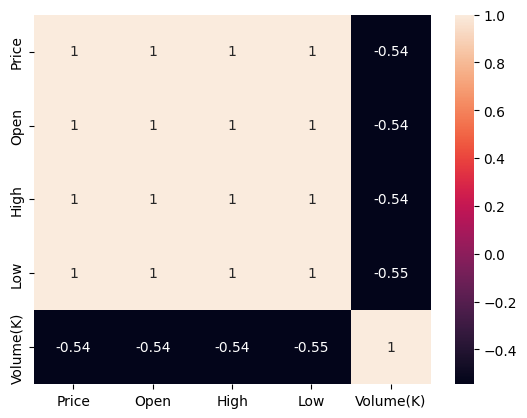

In [30]:
sns.heatmap(df.corr(),annot=True)
plt.show()

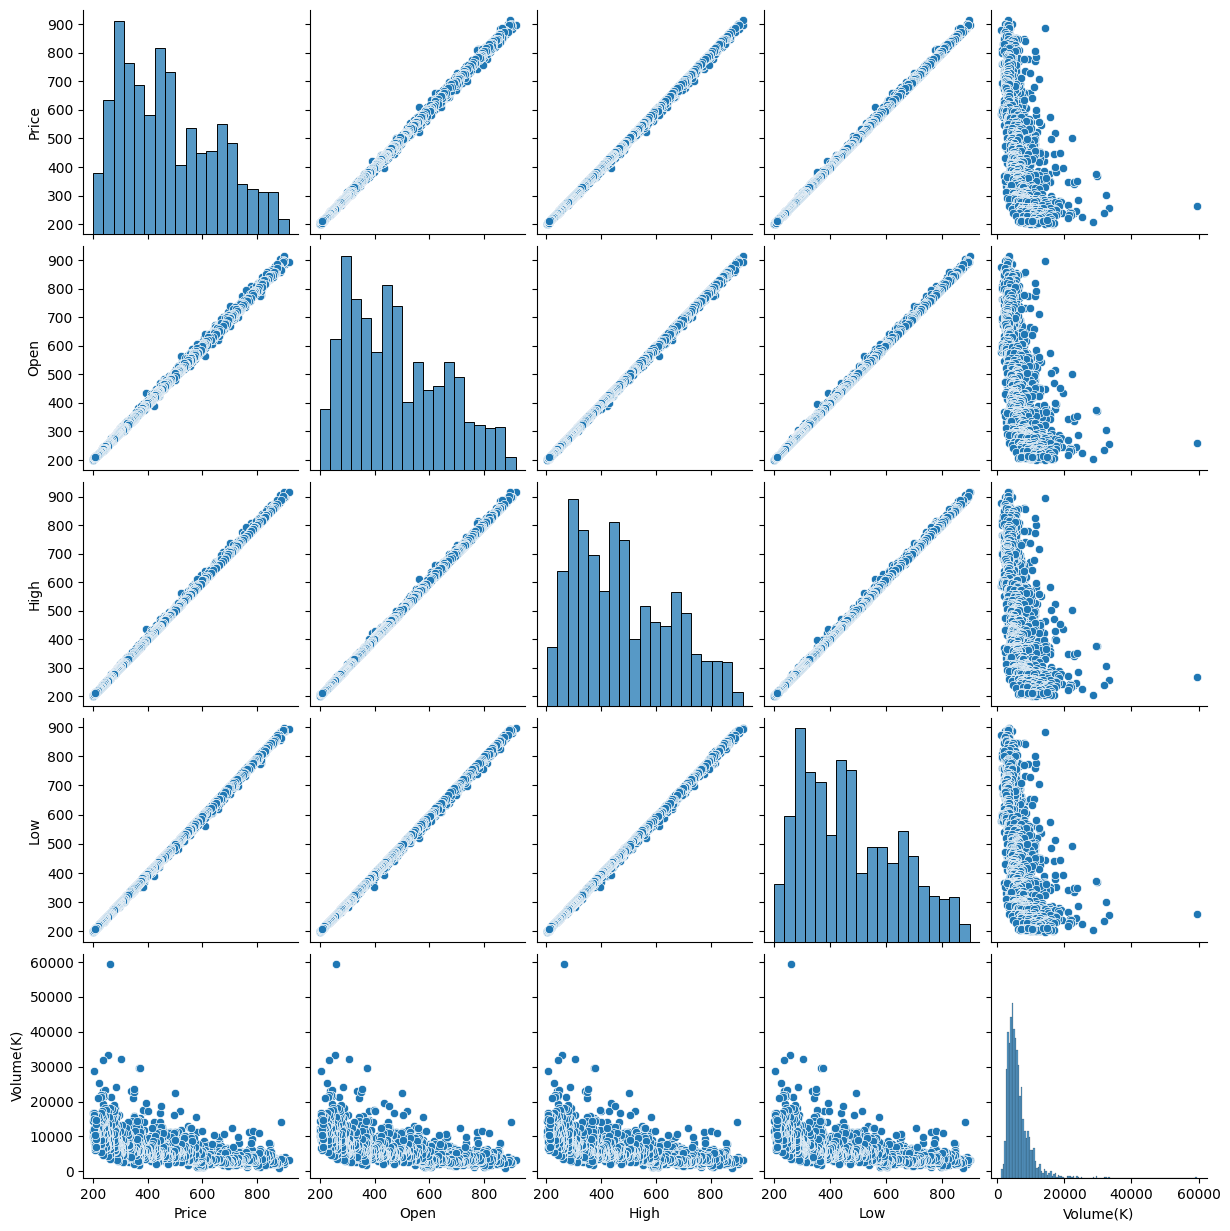

In [31]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

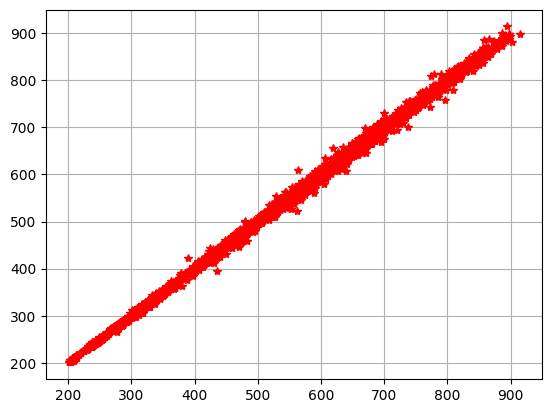

In [32]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [33]:
X=df[['Open']]
X

,Open
0,886.23
1,883.93
2,888.10
3,874.42
4,887.08
...,...
3021,211.78
3022,211.46
3023,212.36
3024,211.03


In [34]:
y=df['Price']
y

0       889.50
1       885.71
2       884.92
3       882.38
4       880.71
         ...  
3021    211.65
3022    211.61
3023    212.24
3024    212.96
3025    209.52
Name: Price, Length: 3026, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [0.99944139]
intercept : 0.3193028772144544


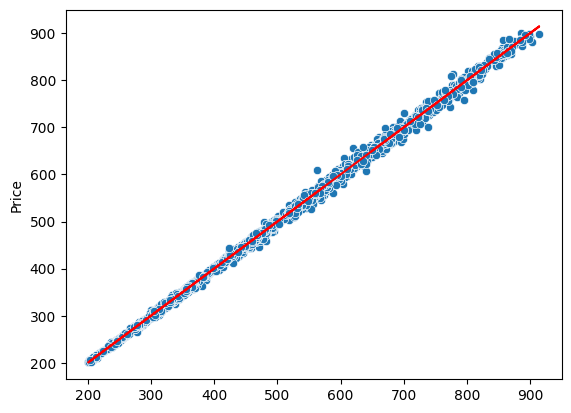

In [39]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [40]:
pred=lr.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [42]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [43]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.385361400686609
MSE : 43.13209196525388
RMSE : 6.5675027190899495
R2 : 0.9985388161462988
Adj R2 : 0.9985352577777842


In [44]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [45]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,4.385361


In [46]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,6.567503


In [47]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.998539


## Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
rr=Ridge(alpha=0.1)

In [50]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

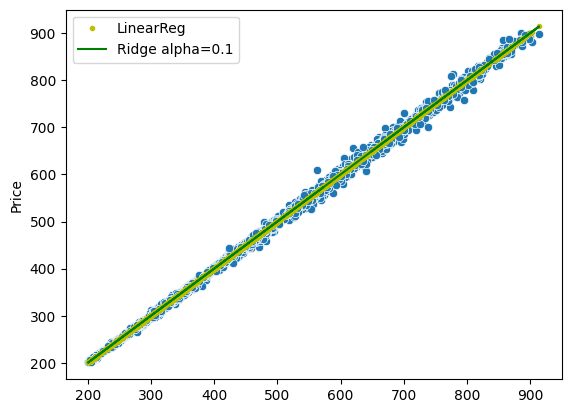

In [51]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [52]:
print(rr.coef_,rr.intercept_)

[0.99944138] 0.31930361538474017


In [53]:
y_pred=rr.predict(X_test)

In [54]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 4.385361410880306
MSE : 43.13209195919411
RMSE : 6.567502718628605
R2 : 0.9985388161465042
Adj R2 : 0.9985352577734484


In [55]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [56]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,4.385361,4.385361


In [57]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,6.567503,6.567503


In [58]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.998539,0.998539


## Lasso Regression

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lsr=Lasso(alpha=0.1)

In [61]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [62]:
print(lsr.coef_,lsr.intercept_)

[0.9994381] 0.3208671950034159


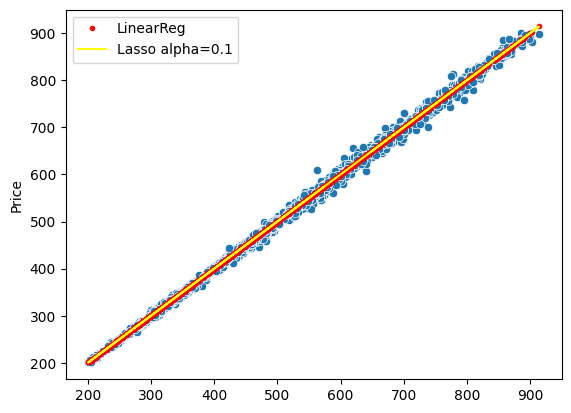

In [63]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [64]:
yl_pred=lsr.predict(X_test)

In [65]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 4.385383002993608
MSE : 43.13207944153526
RMSE : 6.567501765628637
R2 : 0.9985388165705643
Adj R2 : 0.998535248578578


In [66]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [67]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,4.385361,4.385361,4.385383


In [68]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,6.567503,6.567503,6.567502


In [69]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.998539,0.998539,0.998539


## Polynomial Regression

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
poly=PolynomialFeatures(degree=4)

In [72]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

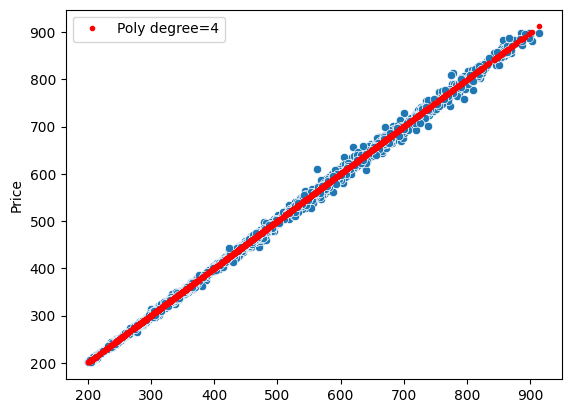

In [73]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [74]:
yp_pred=lin.predict(X_test1)

In [75]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 4.388561484206013
MSE : 43.19583443265569
RMSE : 6.572353796978346
R2 : 0.9985366567457246
Adj R2 : 0.9985334777468351


In [76]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [77]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,4.385361,4.385361,4.385383,4.388561


In [78]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,6.567503,6.567503,6.567502,6.572354


In [79]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.998539,0.998539,0.998539,0.998537


## Ridge on Polynomial Regression

In [80]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.61225e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

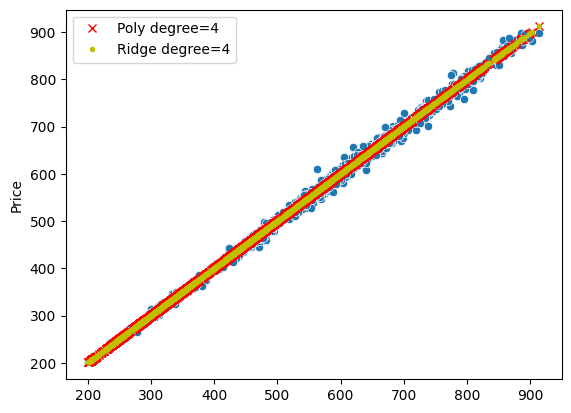

In [81]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [82]:
yr_pred=ridp.predict(X_test1)

In [83]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 4.3885595803941175
MSE : 43.19582281656254
RMSE : 6.572352913269535
R2 : 0.9985366571392423
Adj R2 : 0.9985334781881546


In [84]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [85]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,4.385361,4.385361,4.385383,4.388561,4.38856


In [86]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,6.567503,6.567503,6.567502,6.572354,6.572353


In [87]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.998539,0.998539,0.998539,0.998537,0.998537


## Lasso on polynomial of degree 4

In [88]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.391e+04, tolerance: 6.452e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

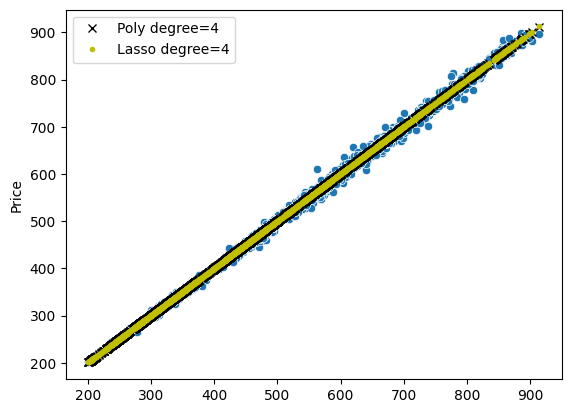

In [89]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [90]:
yl_pred=lsp.predict(X_test1)

In [91]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 4.384087794402648
MSE : 43.15560762598314
RMSE : 6.569292779742971
R2 : 0.9985380195073648
Adj R2 : 0.9985348137991304


In [92]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [93]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088


In [94]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293


In [95]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538


## Multiple Linear Regression

In [96]:
df

,Price,Open,High,Low,Volume(K)
0,889.50,886.23,897.83,886.23,2860.0
1,885.71,883.93,889.91,883.93,2650.0
2,884.92,888.10,896.63,881.14,3780.0
3,882.38,874.42,882.45,865.44,3040.0
4,880.71,887.08,888.52,877.67,3350.0
...,...,...,...,...,...
3021,211.65,211.78,211.80,210.03,9220.0
3022,211.61,211.46,212.21,210.27,9870.0
3023,212.24,212.36,212.82,211.65,9200.0
3024,212.96,211.03,213.97,211.03,14750.0


In [97]:
df.drop(columns=['High','Low'],inplace=True)
df

,Price,Open,Volume(K)
0,889.50,886.23,2860.0
1,885.71,883.93,2650.0
2,884.92,888.10,3780.0
3,882.38,874.42,3040.0
4,880.71,887.08,3350.0
...,...,...,...
3021,211.65,211.78,9220.0
3022,211.61,211.46,9870.0
3023,212.24,212.36,9200.0
3024,212.96,211.03,14750.0


In [98]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,886.23,2860.0
1,883.93,2650.0
2,888.10,3780.0
3,874.42,3040.0
4,887.08,3350.0
...,...,...
3021,211.78,9220.0
3022,211.46,9870.0
3023,212.36,9200.0
3024,211.03,14750.0


In [99]:
y=df['Price']
y

0       889.50
1       885.71
2       884.92
3       882.38
4       880.71
         ...  
3021    211.65
3022    211.61
3023    212.24
3024    212.96
3025    209.52
Name: Price, Length: 3026, dtype: float64

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [101]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [102]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,0.998243
Volume(K),-0.000112


In [103]:
mlin.intercept_

1.5730591861905623

In [104]:
pred=mlin.predict(X_test)

In [105]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.382883219624381
MSE : 42.95664311544634
RMSE : 6.554131759084977
R2 : 0.9985447598187434
Adj R2 : 0.9985396132945175


In [106]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [107]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088,4.382883


In [108]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293,6.554132


In [109]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538,0.998545


## Applying Ridge Regression on Multiple Linear Regression

In [110]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [111]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,0.998243,0.998243
Volume(K),-0.000112,-0.000112


In [112]:
ridm.intercept_

1.573060553773871

In [113]:
pred=ridm.predict(X_test)

In [114]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.3828832320139
MSE : 42.95664306353208
RMSE : 6.554131755124555
R2 : 0.9985447598205021
Adj R2 : 0.9985396132917665


In [115]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [116]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088,4.382883,4.382883


In [117]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293,6.554132,6.554132


In [118]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538,0.998545,0.998545


## Applying Lasso Regression on Multiple Linear Regression

In [119]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [120]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,0.998243,0.998243,0.998246
Volume(K),-0.000112,-0.000112,-0.000112


In [121]:
lso.intercept_

1.5711318706664201

In [122]:
pred=lso.predict(X_test)

In [123]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 4.38286592545139
MSE : 42.95672076037275
RMSE : 6.554137682439449
R2 : 0.9985447571883699
Adj R2 : 0.9985396166055823


In [124]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [125]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088,4.382883,4.382883,4.382866


In [126]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293,6.554132,6.554132,6.554138


In [127]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538,0.998545,0.998545,0.998545


## adding more Features

In [128]:
df

,Price,Open,Volume(K)
0,889.50,886.23,2860.0
1,885.71,883.93,2650.0
2,884.92,888.10,3780.0
3,882.38,874.42,3040.0
4,880.71,887.08,3350.0
...,...,...,...
3021,211.65,211.78,9220.0
3022,211.61,211.46,9870.0
3023,212.24,212.36,9200.0
3024,212.96,211.03,14750.0


In [129]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7480\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,889.50,886.23,2860.0,887.148571
1,885.71,883.93,2650.0,887.148571
2,884.92,888.10,3780.0,887.148571
3,882.38,874.42,3040.0,887.148571
4,880.71,887.08,3350.0,887.148571
...,...,...,...,...
3021,211.65,211.78,9220.0,209.545714
3022,211.61,211.46,9870.0,210.221429
3023,212.24,212.36,9200.0,211.302857
3024,212.96,211.03,14750.0,211.605714


In [130]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7480\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,889.50,886.23,2860.0,887.148571,890.030714
1,885.71,883.93,2650.0,887.148571,890.030714
2,884.92,888.10,3780.0,887.148571,890.030714
3,882.38,874.42,3040.0,887.148571,890.030714
4,880.71,887.08,3350.0,887.148571,890.030714
...,...,...,...,...,...
3021,211.65,211.78,9220.0,209.545714,207.976429
3022,211.61,211.46,9870.0,210.221429,208.383571
3023,212.24,212.36,9200.0,211.302857,208.727143
3024,212.96,211.03,14750.0,211.605714,209.267857


In [131]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=100-(100/(1+rs))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7480\3173424381.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI'].fillna(method='bfill',inplace=True)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7480\3173424381.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['RSI'].fillna(method='bfill',inplace=True)


,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,889.50,886.23,2860.0,887.148571,890.030714,1760.755814
1,885.71,883.93,2650.0,887.148571,890.030714,1760.755814
2,884.92,888.10,3780.0,887.148571,890.030714,1760.755814
3,882.38,874.42,3040.0,887.148571,890.030714,1760.755814
4,880.71,887.08,3350.0,887.148571,890.030714,1760.755814
...,...,...,...,...,...,...
3021,211.65,211.78,9220.0,209.545714,207.976429,214.053254
3022,211.61,211.46,9870.0,210.221429,208.383571,235.964912
3023,212.24,212.36,9200.0,211.302857,208.727143,261.122661
3024,212.96,211.03,14750.0,211.605714,209.267857,175.429326


<Axes: >

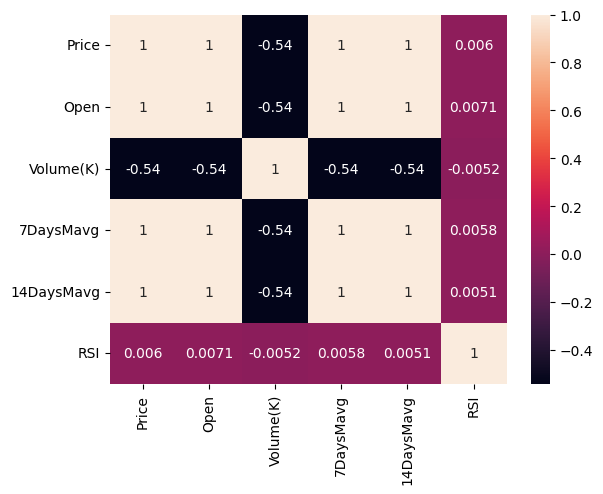

In [132]:
sns.heatmap(df.corr(),annot=True)

In [133]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()
df.isnull().sum()

Price         0
Open          0
Volume(K)     0
7DaysMavg     0
14DaysMavg    0
RSI           0
dtype: int64

In [134]:
X=df.drop(columns='Price')
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,886.23,2860.0,887.148571,890.030714,1760.755814
1,883.93,2650.0,887.148571,890.030714,1760.755814
2,888.10,3780.0,887.148571,890.030714,1760.755814
3,874.42,3040.0,887.148571,890.030714,1760.755814
4,887.08,3350.0,887.148571,890.030714,1760.755814
...,...,...,...,...,...
3021,211.78,9220.0,209.545714,207.976429,214.053254
3022,211.46,9870.0,210.221429,208.383571,235.964912
3023,212.36,9200.0,211.302857,208.727143,261.122661
3024,211.03,14750.0,211.605714,209.267857,175.429326


In [135]:
y=df['Price']
y

0       889.50
1       885.71
2       884.92
3       882.38
4       880.71
         ...  
3021    211.65
3022    211.61
3023    212.24
3024    212.96
3025    209.52
Name: Price, Length: 3025, dtype: float64

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [137]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [138]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.659615
Volume(K),-0.000100
7DaysMavg,0.515733
14DaysMavg,-0.176772
RSI,-0.000034


In [139]:
mlin.intercept_

1.2321515530626357

In [140]:
pred=mlin.predict(X_test)

In [141]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 3.6451811825112097
MSE : 27.56901120338719
RMSE : 5.250620077989569
R2 : 0.9990629017225967
Adj R2 : 0.9990560339030294


In [142]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088,4.382883,4.382883,4.382866,3.645181


In [143]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293,6.554132,6.554132,6.554138,5.25062


In [144]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538,0.998545,0.998545,0.998545,0.999063


## Ridge

In [145]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [146]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.659615,0.659615
Volume(K),-0.000100,-0.000100
7DaysMavg,0.515733,0.515732
14DaysMavg,-0.176772,-0.176771
RSI,-0.000034,-0.000034


In [147]:
ridm.intercept_

1.2321519624844655

In [148]:
pred=ridm.predict(X_test)

In [149]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 3.645180916484294
MSE : 27.569007227736858
RMSE : 5.250619699400906
R2 : 0.999062901857733
Adj R2 : 0.9990560340382604


In [150]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088,4.382883,4.382883,4.382866,3.645181,3.645181


In [151]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293,6.554132,6.554132,6.554138,5.25062,5.25062


In [152]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538,0.998545,0.998545,0.998545,0.999063,0.999063


## Lasso

In [153]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.962e+04, tolerance: 6.461e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [154]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.659615,0.659615,0.700901
Volume(K),-0.000100,-0.000100,-0.000108
7DaysMavg,0.515733,0.515732,0.410496
14DaysMavg,-0.176772,-0.176771,-0.112823
RSI,-0.000034,-0.000034,-0.000031


In [155]:
lso.intercept_

1.2652675037298877

In [156]:
pred=lso.predict(X_test)

In [157]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 3.625778292952959
MSE : 27.51307110691656
RMSE : 5.2452903739370385
R2 : 0.9990648031824515
Adj R2 : 0.999058178321955


In [158]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,4.385361,4.385361,4.385383,4.388561,4.38856,4.384088,4.382883,4.382883,4.382866,3.645181,3.645181,3.625778


In [159]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,6.567503,6.567503,6.567502,6.572354,6.572353,6.569293,6.554132,6.554132,6.554138,5.25062,5.25062,5.24529


In [160]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.998539,0.998539,0.998539,0.998537,0.998537,0.998538,0.998545,0.998545,0.998545,0.999063,0.999063,0.999065
